In [1]:
# Mengimport library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

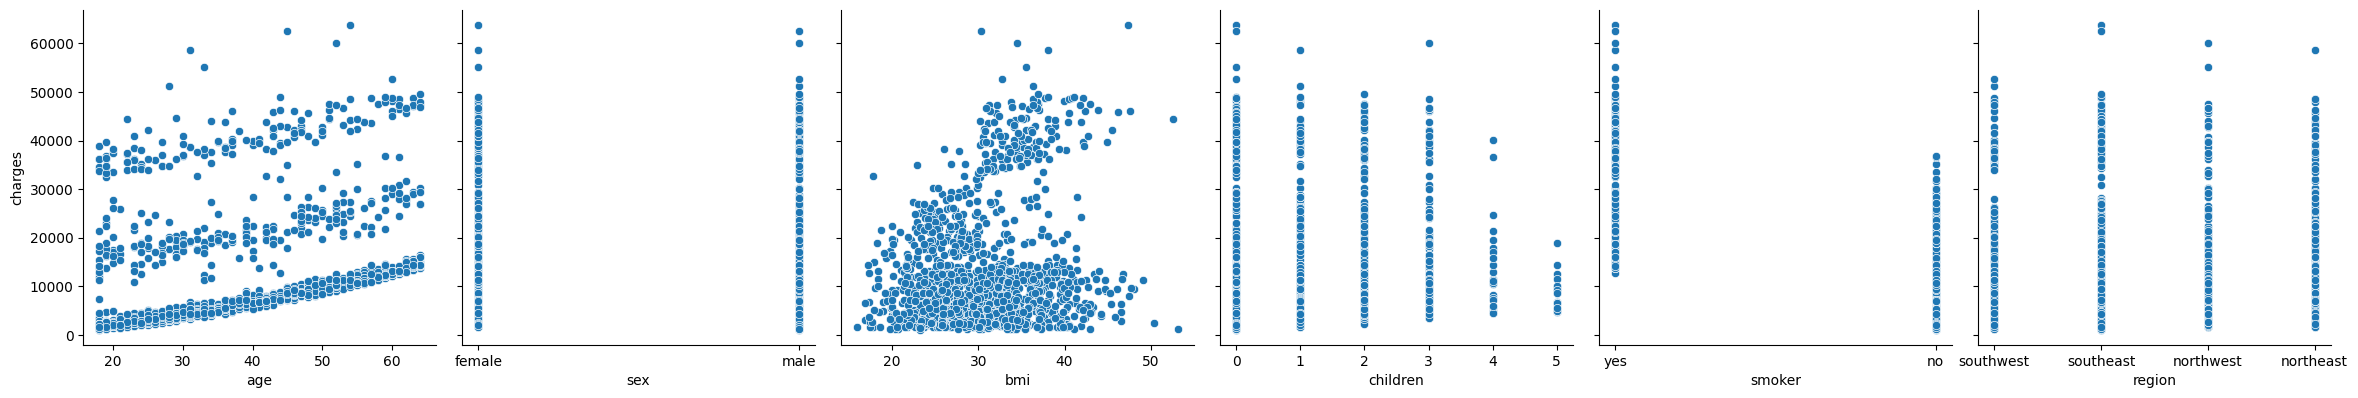

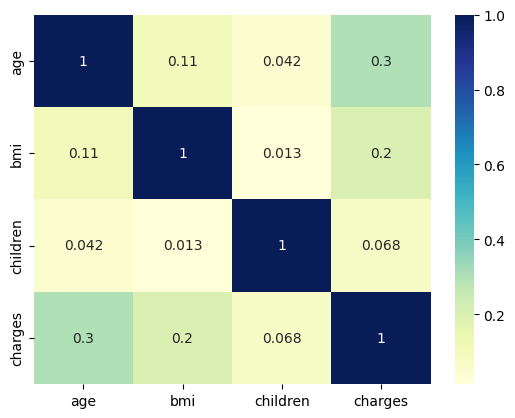

In [2]:
df = pd.read_csv('../assets/insurance.csv')
sns.pairplot(df, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

numeric_data = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [3]:
X = df[['age', 'bmi', 'children']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 1070
Test set size: 268


3. Lakukan feature scaling jika diperlukan

In [4]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)

X_test_scaled = std.transform(X_test)

4. Buat model multiple linear regression menggunakan Scikit-Learn
5. Latih model pada data latih dan lakukan prediksi pada data uji

In [5]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

6. Evaluasi model dengan menghitung metrik seperti R-Squared, MSE, dan MAE. Tampilkan hasil evaluasi.

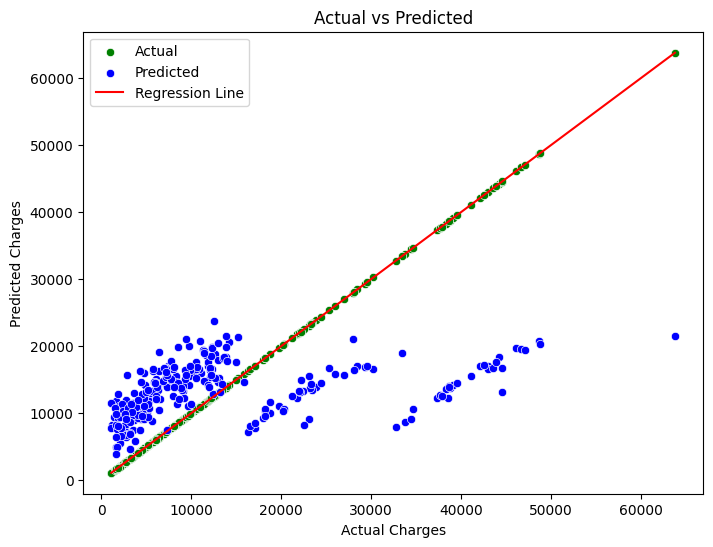

MAE: 9181.311632897381
MSE: 131201335.64669806
R-Squared: 0.15489592484270753


In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test, color='green', label='Actual')
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-Squared: {r2}")